# Proyecto 1
# Introducción 
# ---------------------------------------------------

En este proyecto vamos a desarrollar los conceptos adquiridos durante las clases. Partiremos de una base de datos que contiene distintas variables para distintos pacientes (observaciones), la cual tiene como objetivo predecir si un paciente va a sufrir o no un fallo cardiaco. La salida de nuestro dataframe será la variable que contiene si el paciente ha fallecido durante el proceso de observación. En este proyecto veremos la separación de los datos en dos conjuntos (train y test), repasaremos distintas características de los conjuntos (estadísticos, gráficas...), y por último realizaremos un preprocesado de los datos.

<h2>Tabla de contenidos</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px; background-color: #FFECB3; color: #FFB300;">
<ol>
    <li> Análisis descriptivo de la base de datos </li>
    <li> Separación de conjuntos de entrenamiento y test </li>
    <li> Visualización de datos </li>
    <li> Preprocesamiento </li>
    <li> Normalización </li>
 
   
</ol>

</div>

<hr>


## Descripción 
El objetivo a realizar con este conjunto de datos es predecir si un paciente va a sufrir un fallo cardiaco.
Disponemos de distintas features recogidas en el Faisalabad Institute of Cardiology y en el Allied Hospital en Faisalabad (Pakistán).
- Age: Edad del paciente (Años).
- Anemia: Si el paciente tiene anemia o no (0, 1).
- High blood pressure: Si el paciente tiene hipertensión (0, 1).
- Creatinine phosphokinase: Nivel de la encima CPK en sangre (mcg/L).
- Diabetes: Si el paciente tiene diabetes (0, 1).
- Ejection fraction: Porcentaje de sangre que sale del corazón con cada contracción (Porcentaje).
- Sex: sexo del paciente (0 -> mujer y 1 -> hombre).
- Platelets: Plaquetas en sangre (kiloplatelets/mL).
- Serum creatinine: Nivel de creatinina en la sangre (mg/dL).
- Serum sodium: Nivel de sodio en la sangre (mEq/L).
- Smoking: Si el paciente fuma (0, 1).
- Time: Periodo de seguimiento (Días).
- (target) death event: si el paciente murió durante el seguimiento (0, 1).


## 0.- Cargar y leer la base de datos

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import sklearn as skl
from sklearn import model_selection
from sklearn import utils
import plotly.express as px


In [2]:
# Cargamos la base de datos
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

## 1.- Análisis descriptivo de la base de datos.

#### Primero indicamos el tipo de de las variales disponibles en la base de datos.

In [3]:
# Primero mostramos los nombres de las columnas

df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
# Ahora mostramos el número de muestras y características.

# Número de observaciones y variables en la base de datos
print("El número de observaciones es:",df.shape[0])
print("El número de variables es:",df.shape[1])


El número de observaciones es: 299
El número de variables es: 13


In [5]:
# Ahora mostramos el tipo de las variables disponibles en la base de datos

df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

## 2.- Separamos los datos en conjuntos de entrenamiento y test.

In [6]:
# Creamos x (input) e y (output)

# x es un dataframe con todas las variables que se han recogido de los pacientes
# y sería un dataframe con el valor que queremos predecir

x = df[["age", "anaemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction", "high_blood_pressure", "platelets", "serum_creatinine","serum_sodium","sex","smoking","time"]]
y = df["DEATH_EVENT"]

In [7]:
# Para separar los conjuntos de test y training, vamos a utilizar la librería sklearn, en concreto la función train_test_split del módulo model_selection 
# Esta función nos permitirá dividir los datos en dos conjuntos de forma automática y aleatoria

x, y = utils.shuffle(x,y, random_state=0) # Barajamos los dos conjuntos

# Vamos a separar los datos en un 70% entrenamiento y un 30% test
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state = 0) # Random state se usa para obtener la misma partición

#### Ahora describimos los dos conjuntos.

In [8]:
# Describimos el conjunto de entrenamiento

X_train.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,60.972890,0.411483,581.612440,0.435407,38.287081,0.387560,262634.184402,1.316507,136.459330,0.636364,0.287081,126.291866
std,12.080871,0.493284,1050.216561,0.497001,11.512697,0.488363,91893.064648,0.739252,4.333404,0.482201,0.453486,77.649583
min,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000
25%,50.000000,0.000000,111.000000,0.000000,30.000000,0.000000,216000.000000,0.900000,134.000000,0.000000,0.000000,71.000000
50%,60.000000,0.000000,232.000000,0.000000,38.000000,0.000000,260000.000000,1.100000,137.000000,1.000000,0.000000,108.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,300000.000000,1.400000,139.000000,1.000000,1.000000,201.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,6.100000,148.000000,1.000000,1.000000,285.000000


In [9]:
# Describimos el conjunto de test

X_test.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,60.511111,0.477778,582.366667,0.377778,37.611111,0.266667,265038.957889,1.573556,137.011111,0.677778,0.400000,139.477778
std,11.510859,0.502304,758.028304,0.487548,12.605237,0.444694,110858.941441,1.503164,4.592359,0.469946,0.492642,77.174576
min,40.000000,0.000000,47.000000,0.000000,14.000000,0.000000,51000.000000,0.600000,116.000000,0.000000,0.000000,8.000000
25%,51.250000,0.000000,130.500000,0.000000,30.000000,0.000000,196250.000000,0.900000,134.000000,0.000000,0.000000,81.750000
50%,60.000000,0.000000,332.500000,0.000000,38.000000,0.000000,262679.015000,1.100000,137.000000,1.000000,0.000000,126.000000
75%,68.750000,1.000000,582.000000,1.000000,43.750000,1.000000,317250.000000,1.475000,140.000000,1.000000,1.000000,207.000000
max,90.000000,1.000000,3966.000000,1.000000,70.000000,1.000000,742000.000000,9.400000,146.000000,1.000000,1.000000,280.000000


## 3.- Visualizamos los datos.

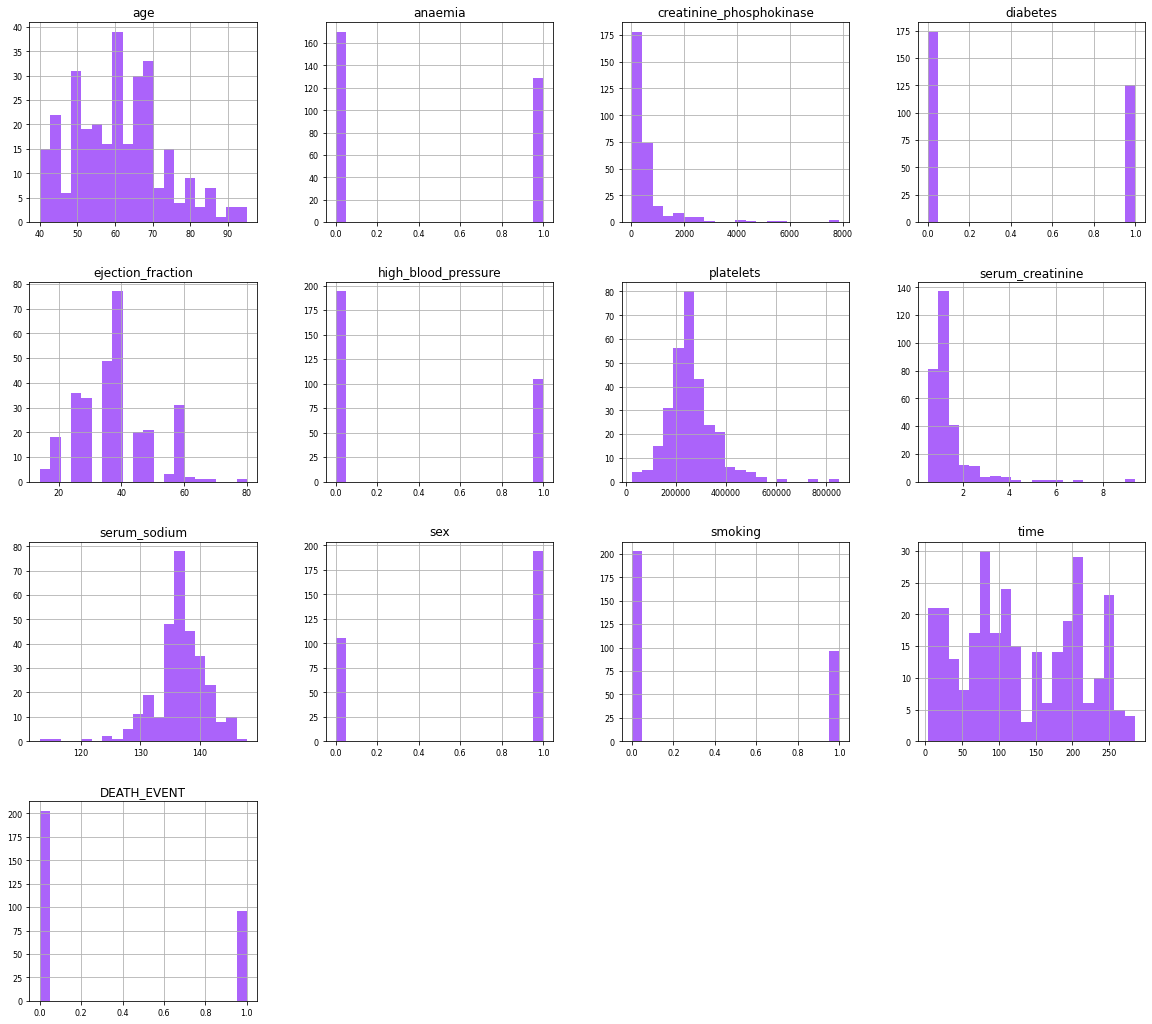

In [10]:
# Puede ser útil visualizar los datos, ya que nos pueden dar ideas de que características son las óptimas para desarrollar nuestro modelo
# Por ellos vamos a representar varios gráficos
# Histograma del dataframe completo

df.hist(figsize=(20, 18), bins=20, xlabelsize=8, ylabelsize=8, color="#AB63FA"); 

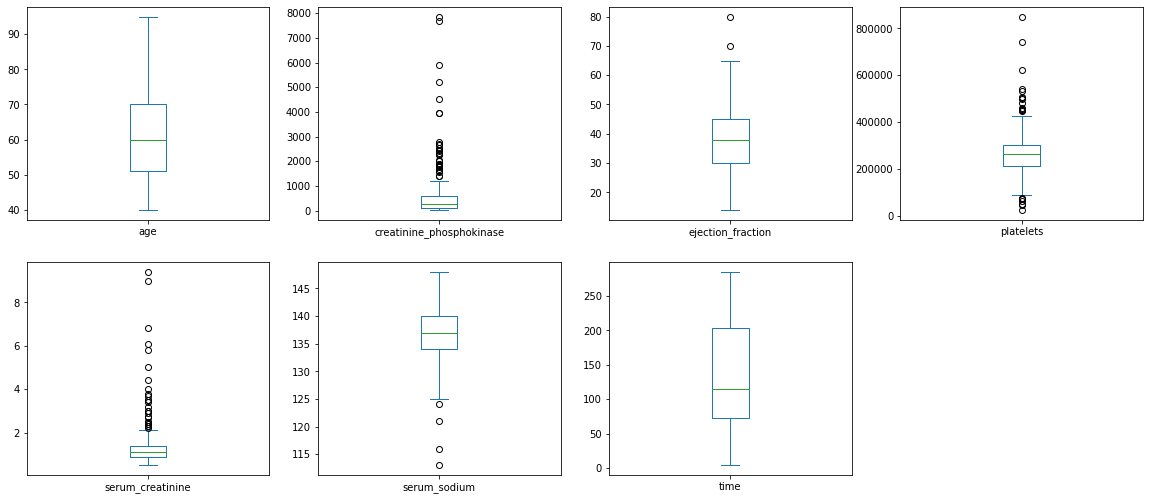

In [11]:
# Diagrama de cajas del dataframe completo

# Primero eliminamos las variables categoricas

c = ("anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT")

df_box = df

for i in range(0,6):
    df_box=df_box.drop(c[i], axis = 1)

df_box.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,18))
plt.show()

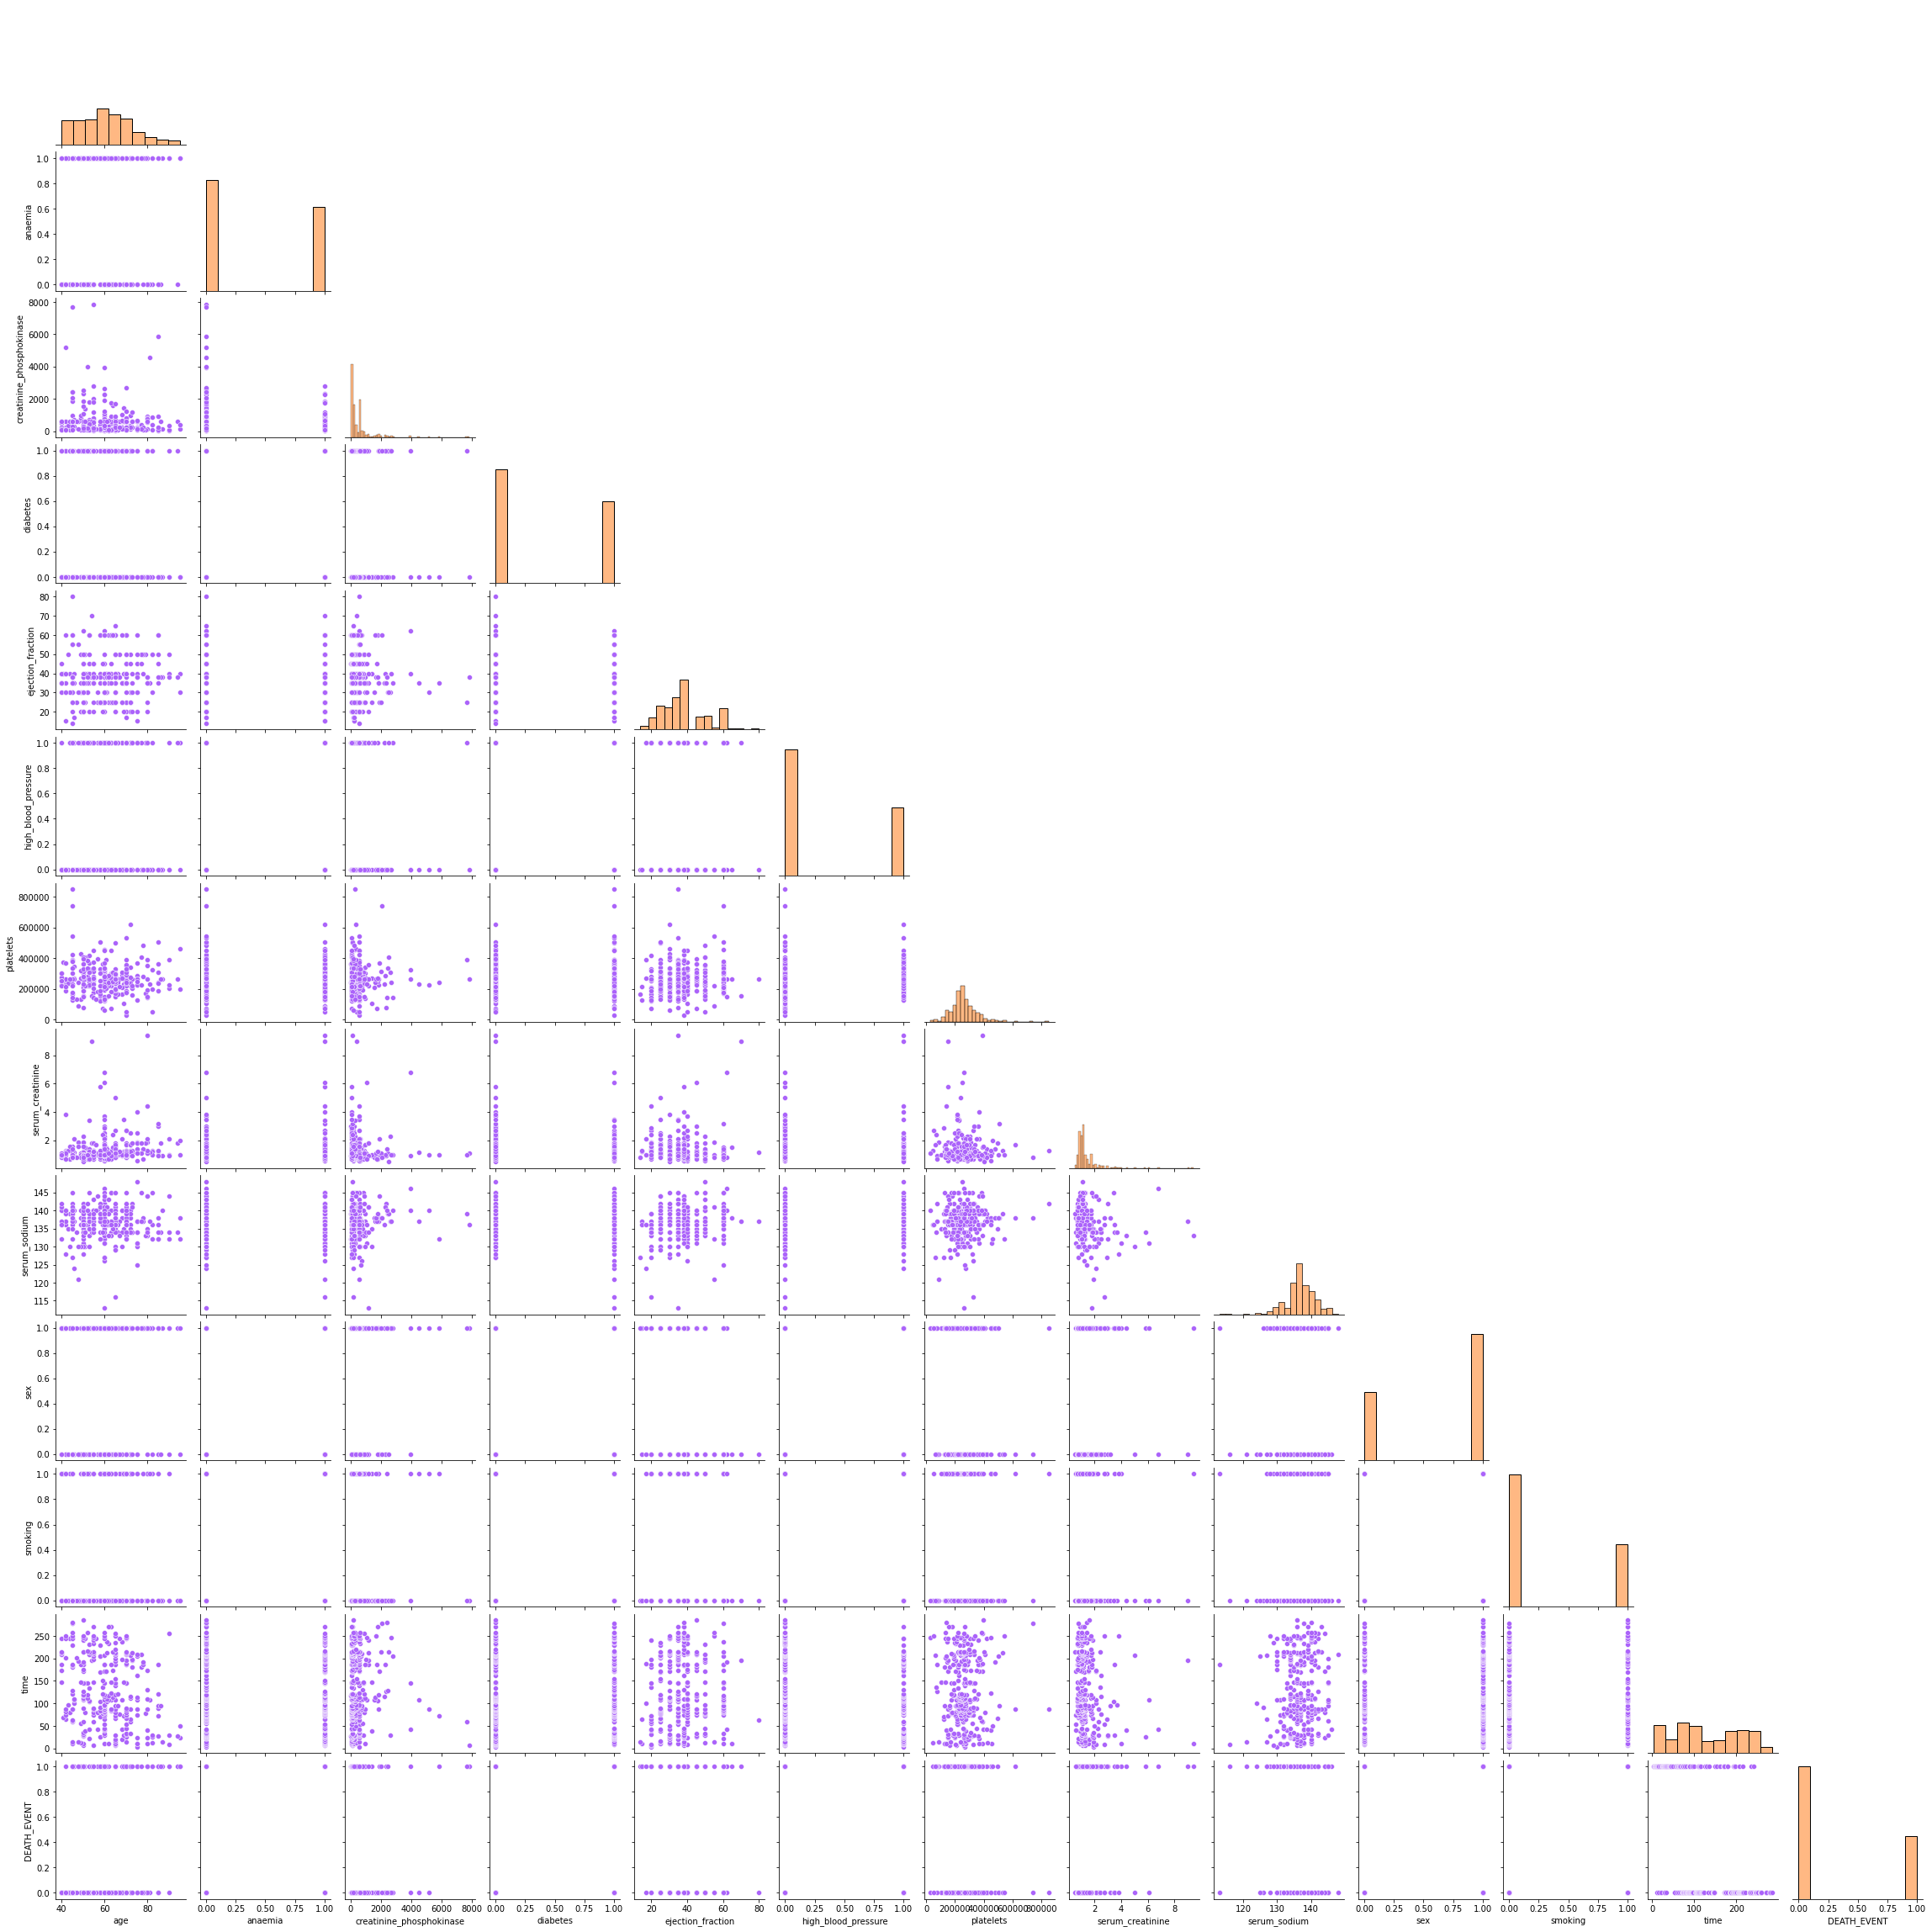

In [12]:
# Gráfrico de dispersión del dataframe

sns.pairplot(df, corner = True, plot_kws= {'color': '#AB63FA'}, diag_kws = {'color': '#FFA15A'})

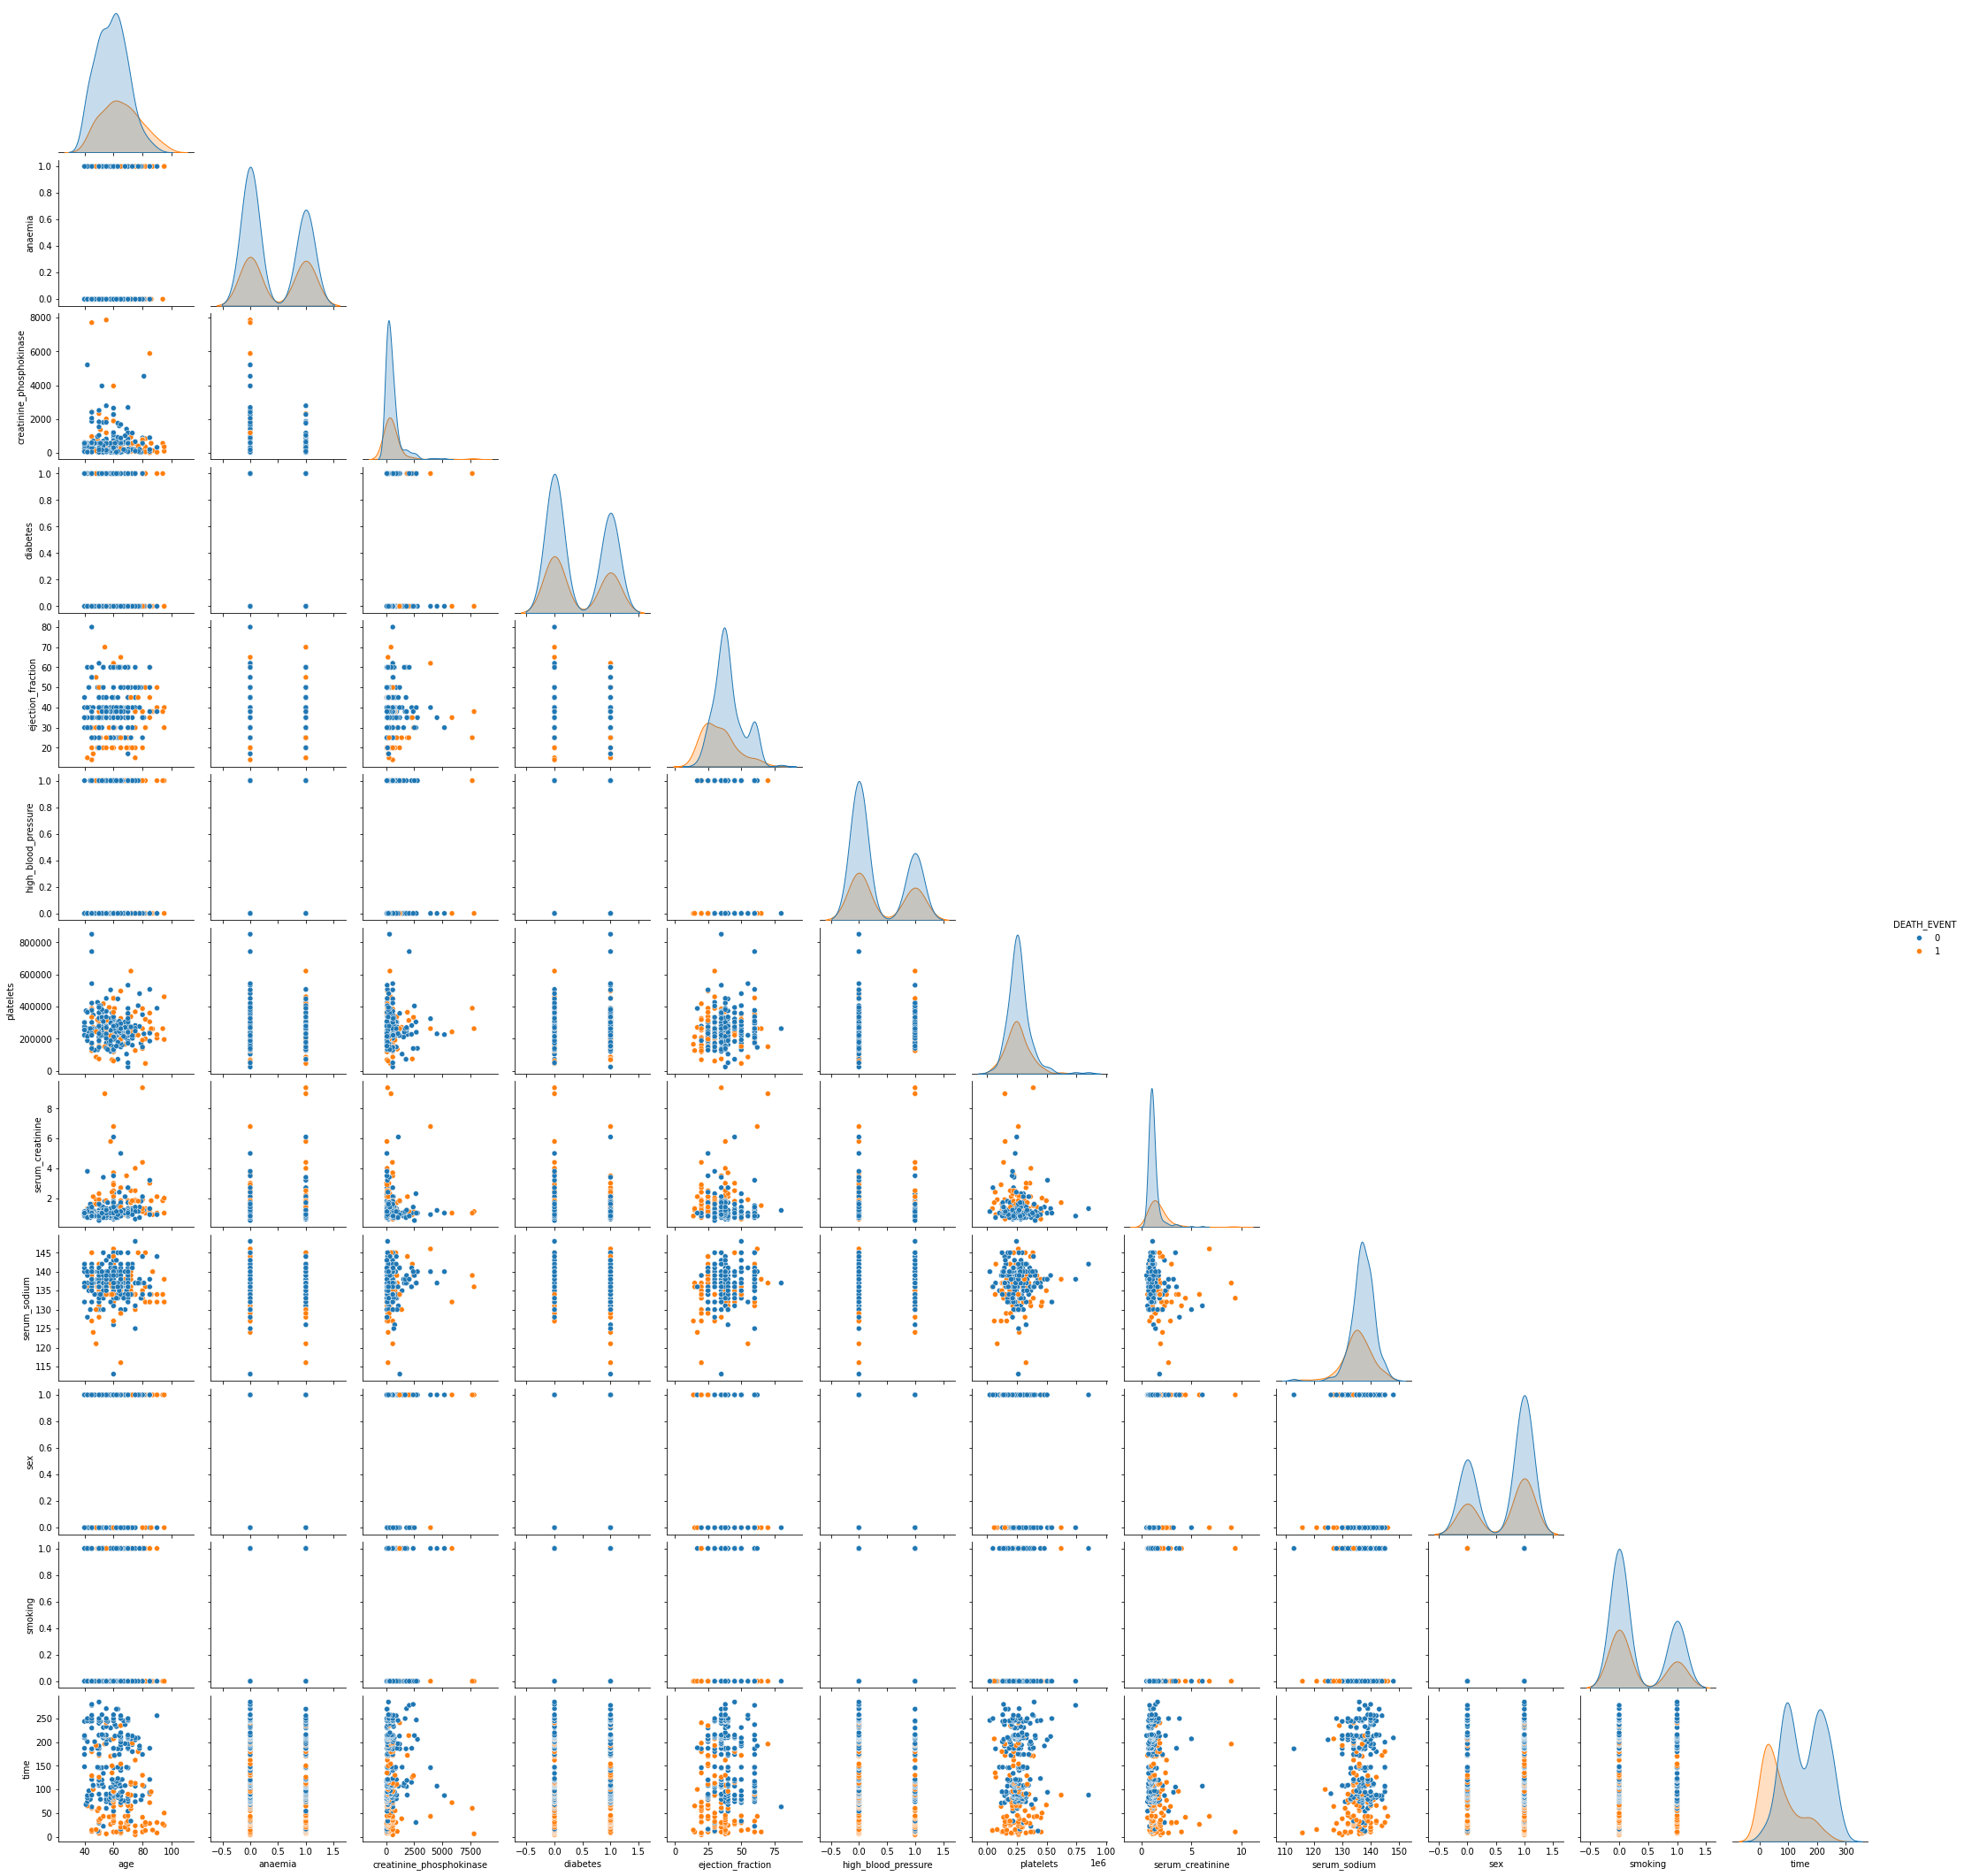

In [13]:
# Gráfrico de dispersión del dataframe en función de la salida

sns.pairplot(df, hue = "DEATH_EVENT", corner = True, plot_kws= {'color': '#AB63FA'}, diag_kws = {'color': '#FFA15A'})

In [14]:
#Describimos los conjuntos de train y test

X_train.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,60.972890,0.411483,581.612440,0.435407,38.287081,0.387560,262634.184402,1.316507,136.459330,0.636364,0.287081,126.291866
std,12.080871,0.493284,1050.216561,0.497001,11.512697,0.488363,91893.064648,0.739252,4.333404,0.482201,0.453486,77.649583
min,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000
25%,50.000000,0.000000,111.000000,0.000000,30.000000,0.000000,216000.000000,0.900000,134.000000,0.000000,0.000000,71.000000
50%,60.000000,0.000000,232.000000,0.000000,38.000000,0.000000,260000.000000,1.100000,137.000000,1.000000,0.000000,108.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,300000.000000,1.400000,139.000000,1.000000,1.000000,201.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,6.100000,148.000000,1.000000,1.000000,285.000000


In [15]:
X_test.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,60.511111,0.477778,582.366667,0.377778,37.611111,0.266667,265038.957889,1.573556,137.011111,0.677778,0.400000,139.477778
std,11.510859,0.502304,758.028304,0.487548,12.605237,0.444694,110858.941441,1.503164,4.592359,0.469946,0.492642,77.174576
min,40.000000,0.000000,47.000000,0.000000,14.000000,0.000000,51000.000000,0.600000,116.000000,0.000000,0.000000,8.000000
25%,51.250000,0.000000,130.500000,0.000000,30.000000,0.000000,196250.000000,0.900000,134.000000,0.000000,0.000000,81.750000
50%,60.000000,0.000000,332.500000,0.000000,38.000000,0.000000,262679.015000,1.100000,137.000000,1.000000,0.000000,126.000000
75%,68.750000,1.000000,582.000000,1.000000,43.750000,1.000000,317250.000000,1.475000,140.000000,1.000000,1.000000,207.000000
max,90.000000,1.000000,3966.000000,1.000000,70.000000,1.000000,742000.000000,9.400000,146.000000,1.000000,1.000000,280.000000


<Axes: title={'center': 'DEATH_EVENT'}, xlabel='DEATH_EVENT'>

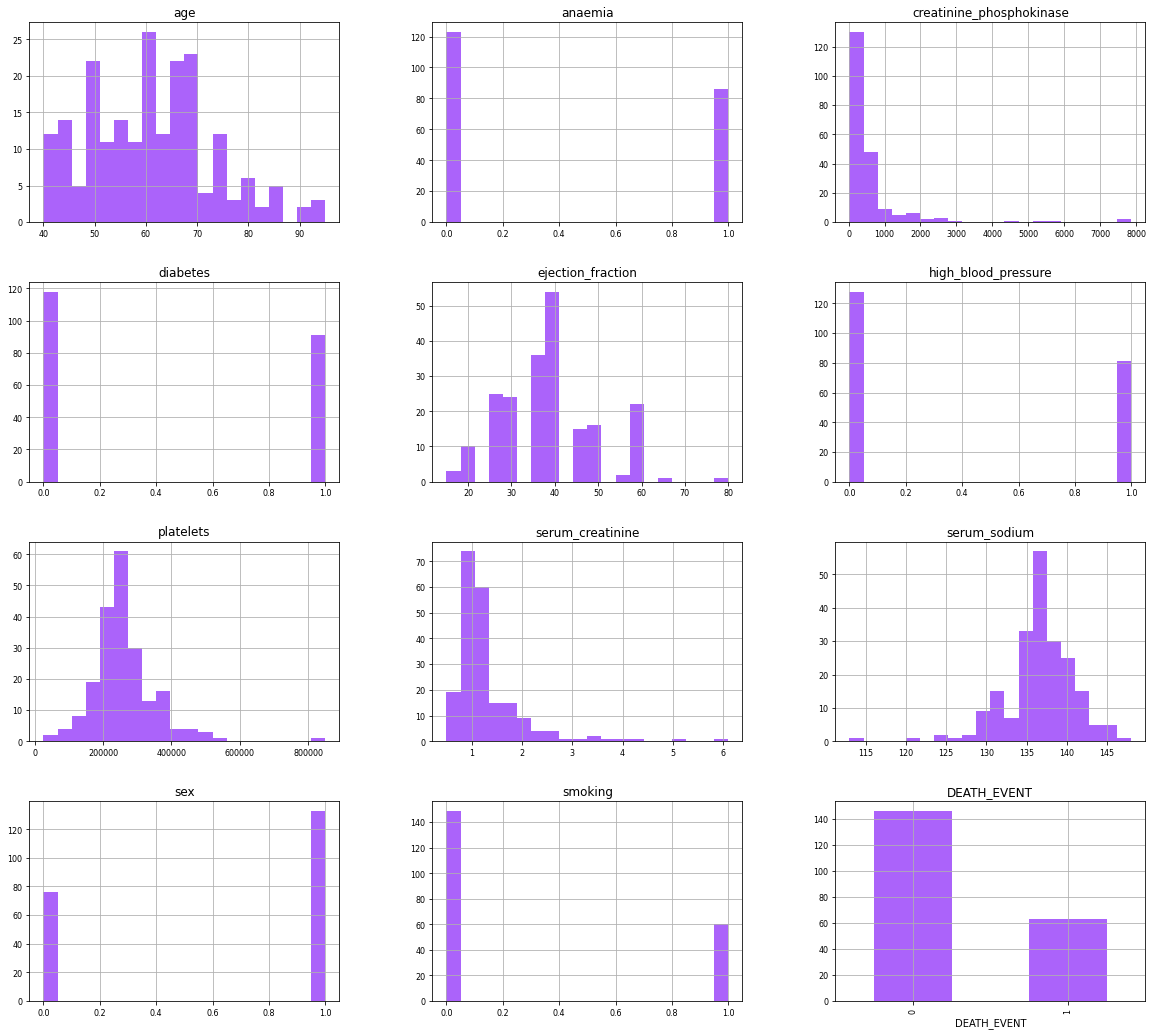

In [16]:
#Histogramas del conjunto train

X_train.hist(figsize=(20, 18), bins=20, xlabelsize=8, ylabelsize=8, color='#AB63FA'); 

# Representamos el numero de salidas (muertes = 1 y no muertes = 0
Y_train.value_counts().plot.bar(title="DEATH_EVENT", color='#AB63FA', grid = True)

<Axes: title={'center': 'DEATH_EVENT'}, xlabel='DEATH_EVENT'>

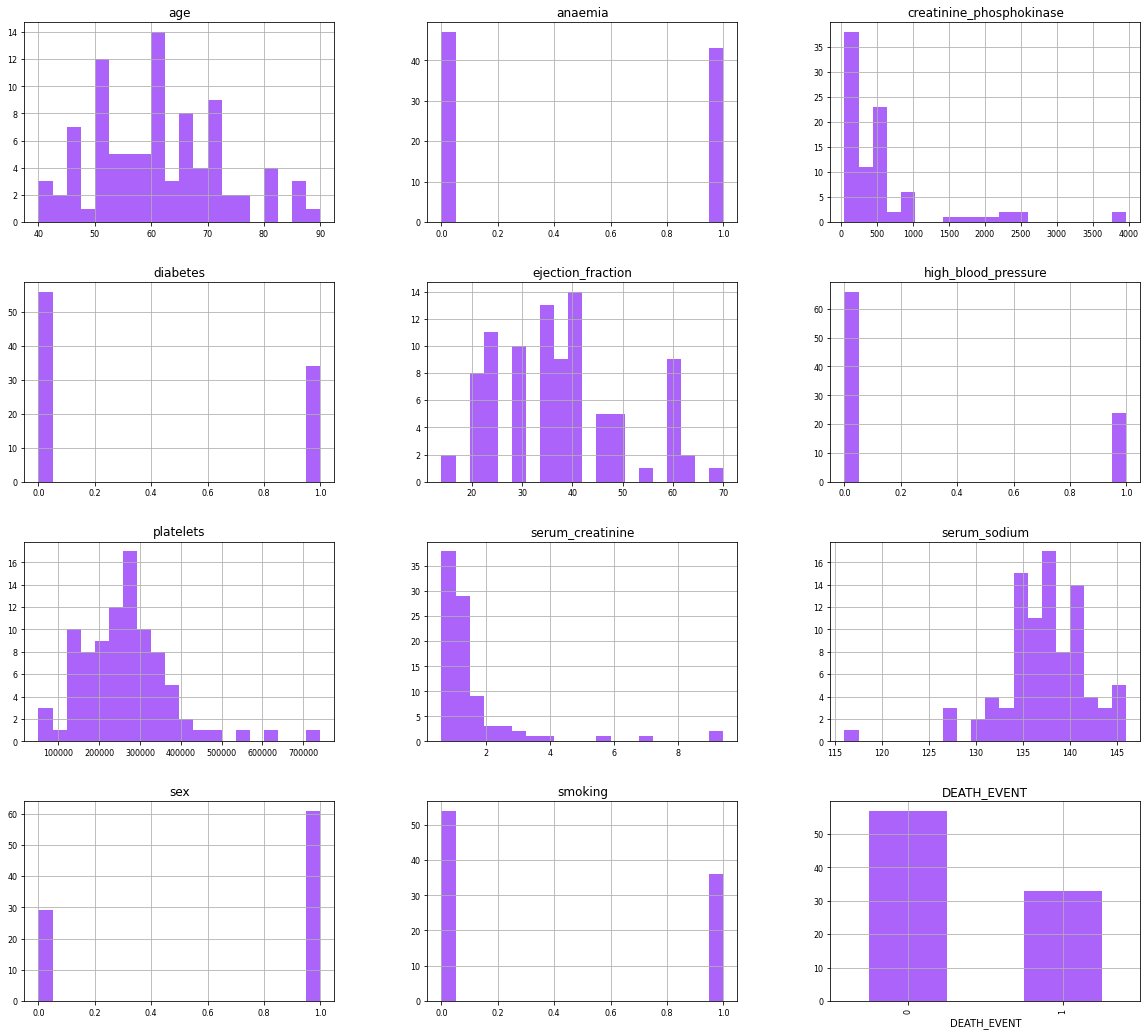

In [17]:
#Histogramas del conjunto test

X_test.hist(figsize=(20, 18), bins=20, xlabelsize=8, ylabelsize=8, color='#AB63FA'); 
Y_test.value_counts().plot.bar(title="DEATH_EVENT", color = '#AB63FA', grid = True)

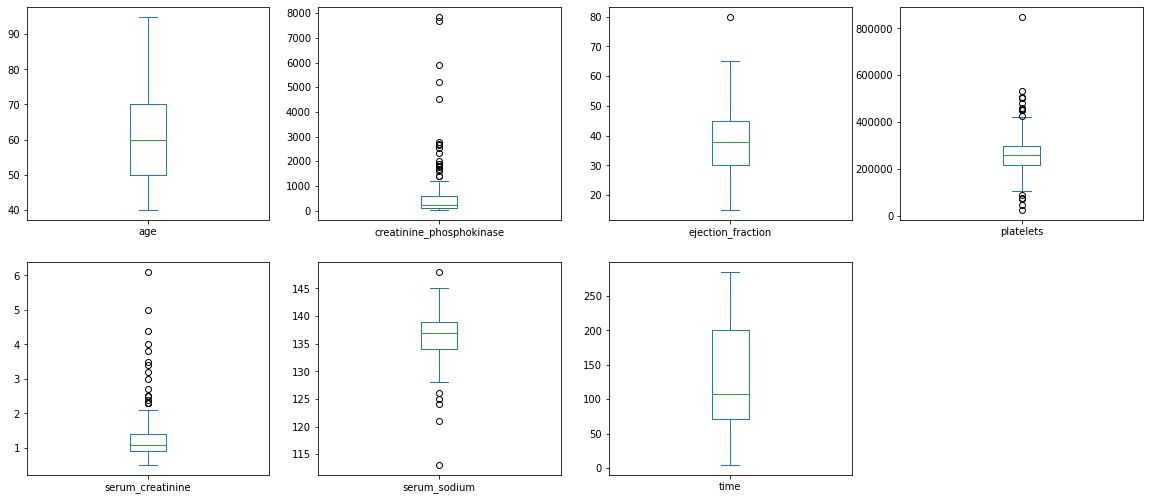

In [18]:
#Diagramas de cajas del conjunto train

# Primero eliminamos las variables categoricas

c = ("anaemia", "diabetes", "high_blood_pressure", "sex", "smoking")

X_train_box = X_train

for i in range(0,5):
    X_train_box=X_train_box.drop(c[i], axis = 1)

X_train_box.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,18))
plt.show()

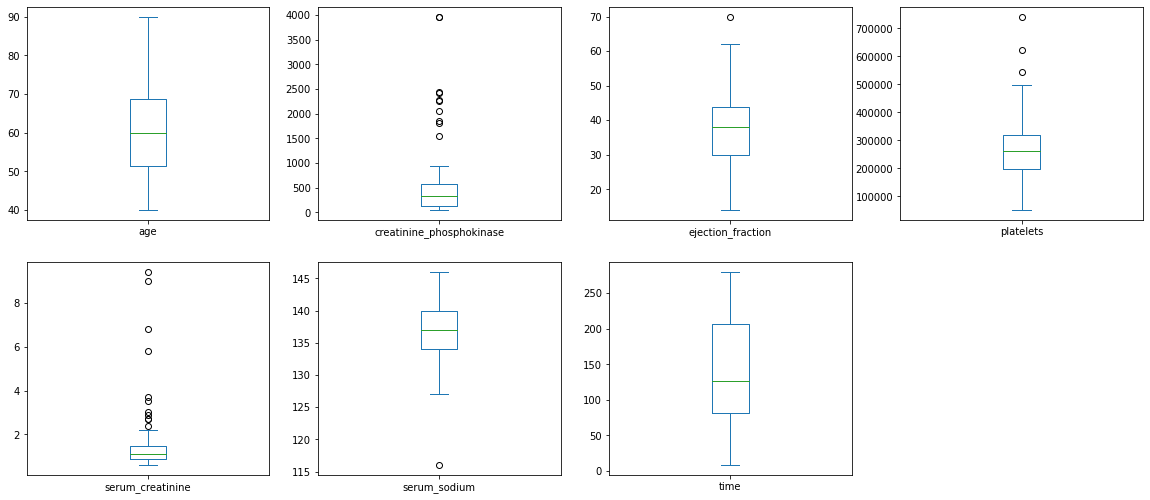

In [19]:
#Diagramas de cajas del conjunto test

# Primero eliminamos las variables categoricas

c = ("anaemia", "diabetes", "high_blood_pressure", "sex", "smoking")

X_test_box = X_test

for i in range(0,5):
    X_test_box=X_test_box.drop(c[i], axis = 1)

X_test_box.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,18))
plt.show()

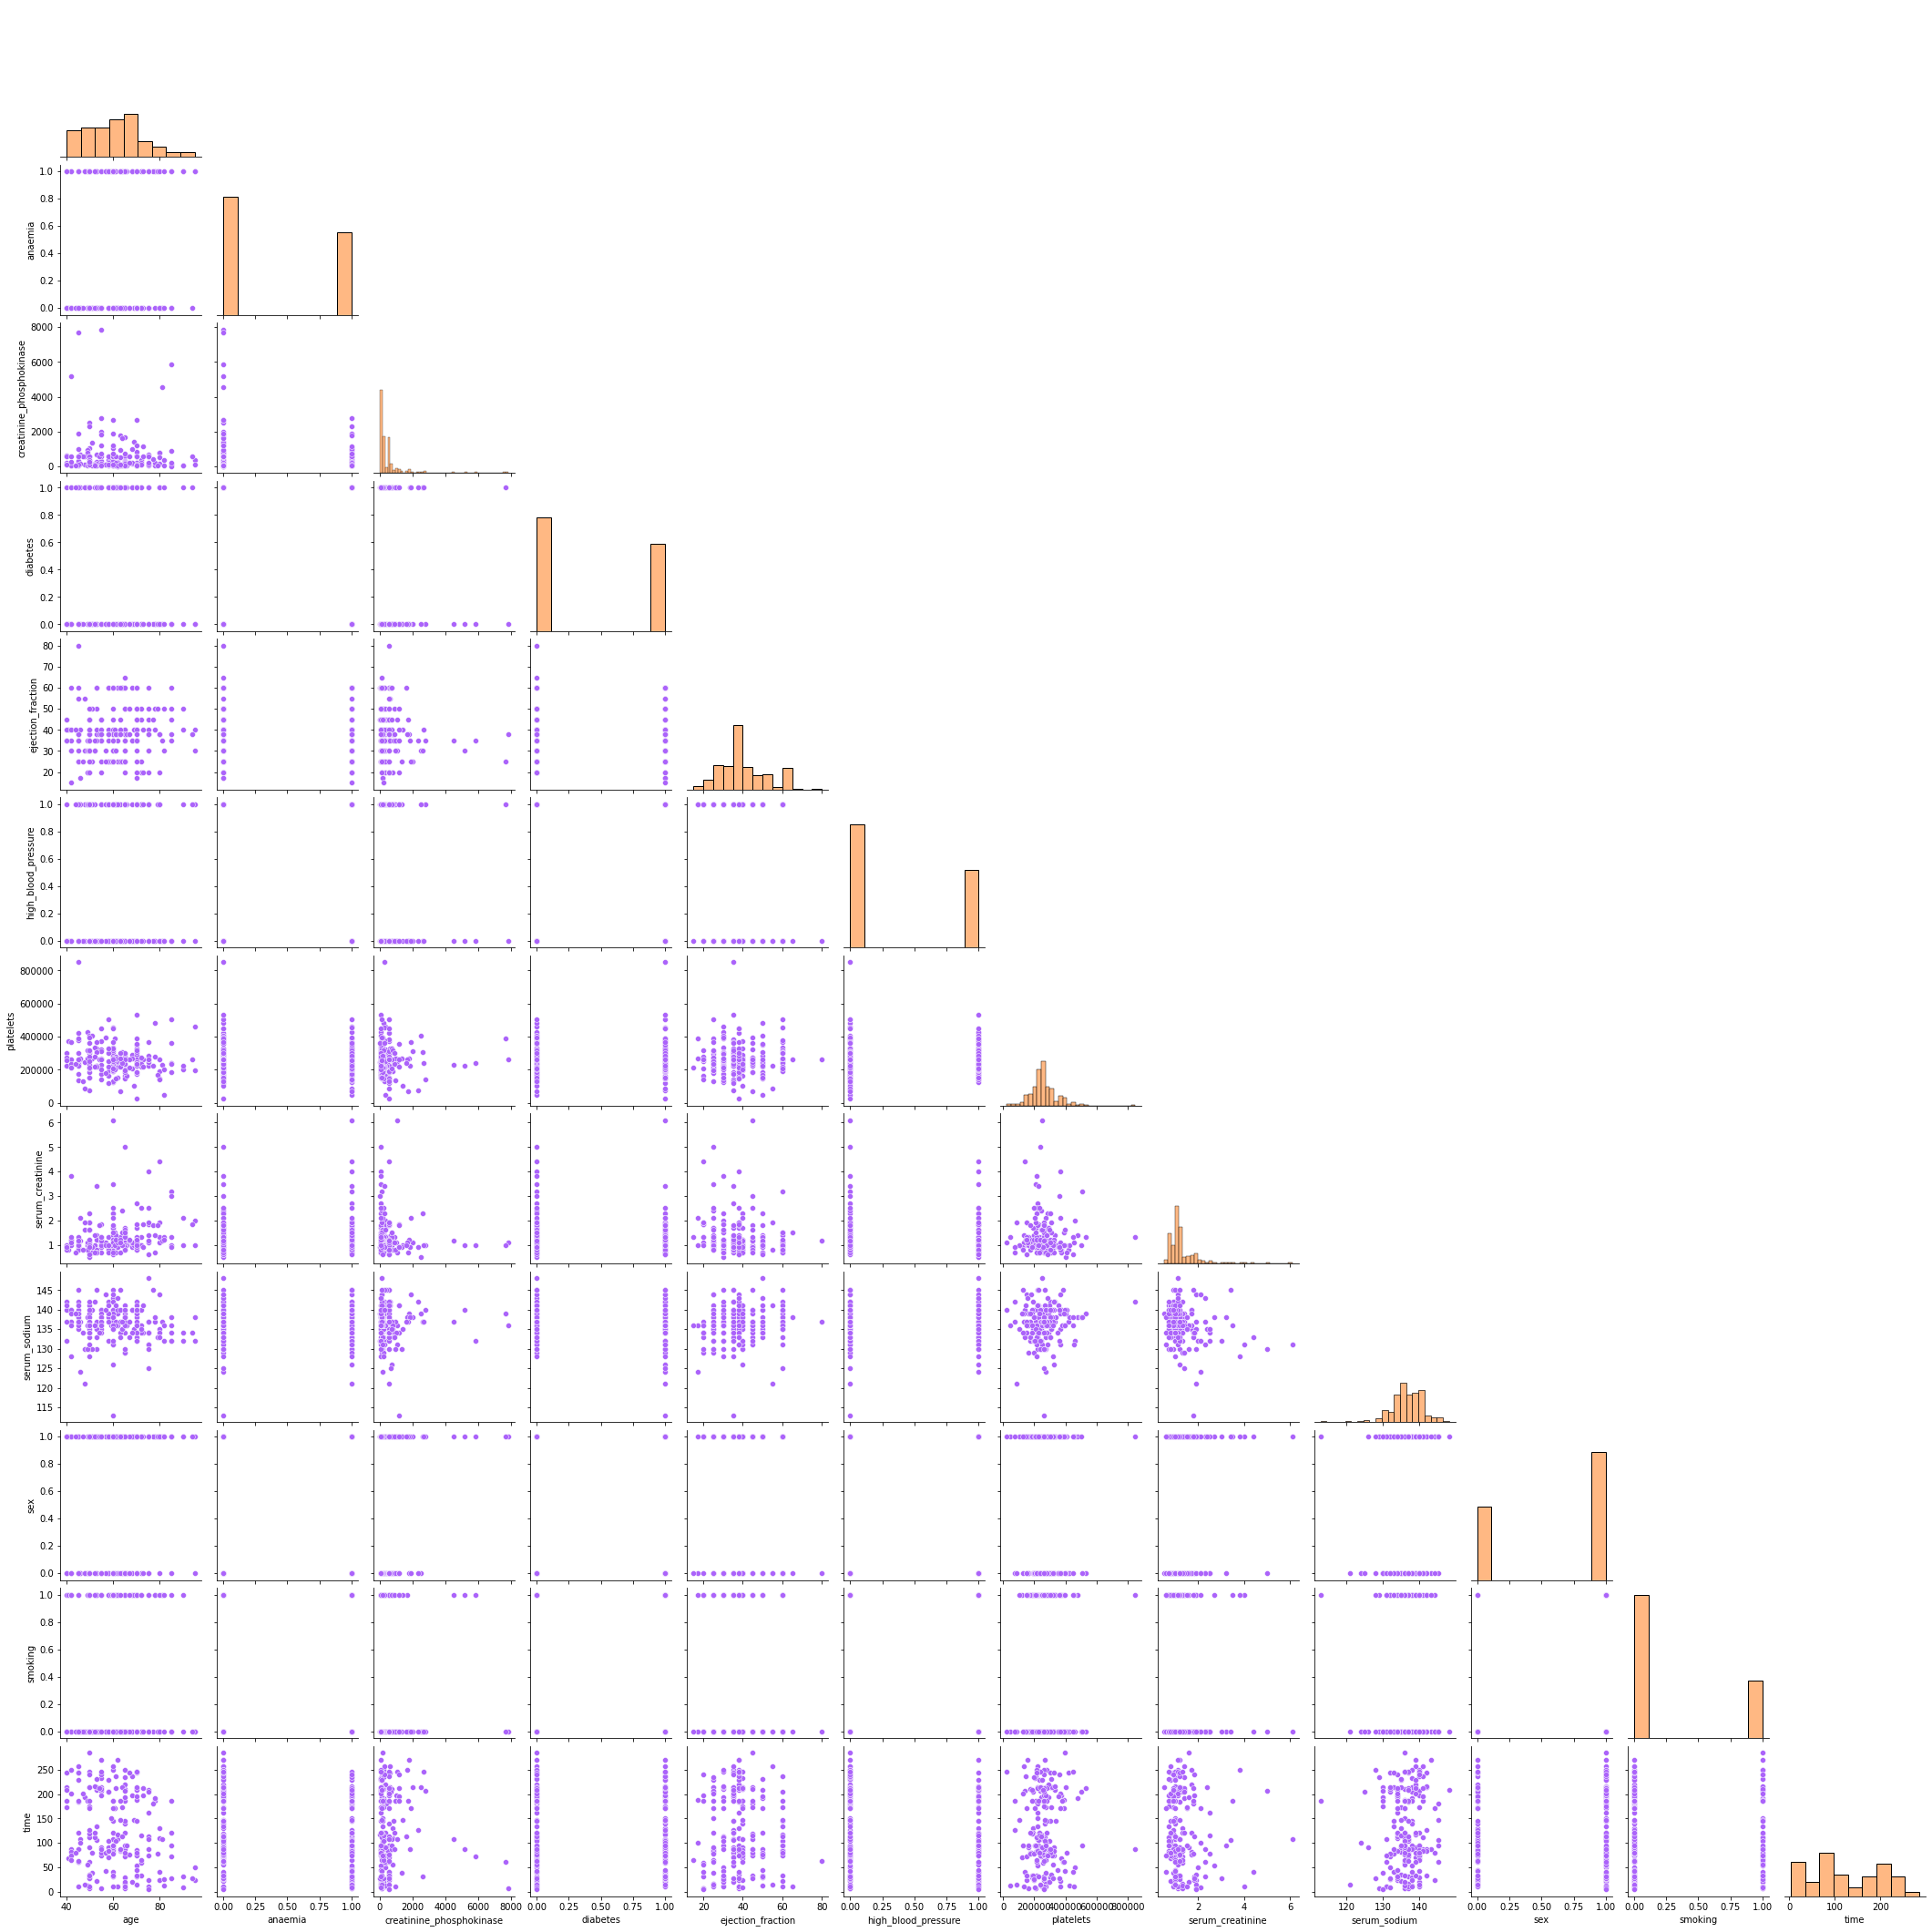

In [20]:
# Gráficos de dispersion del conjunto train

sns.pairplot(X_train, corner = True, plot_kws= {'color': '#AB63FA'}, diag_kws = {'color': '#FFA15A'})

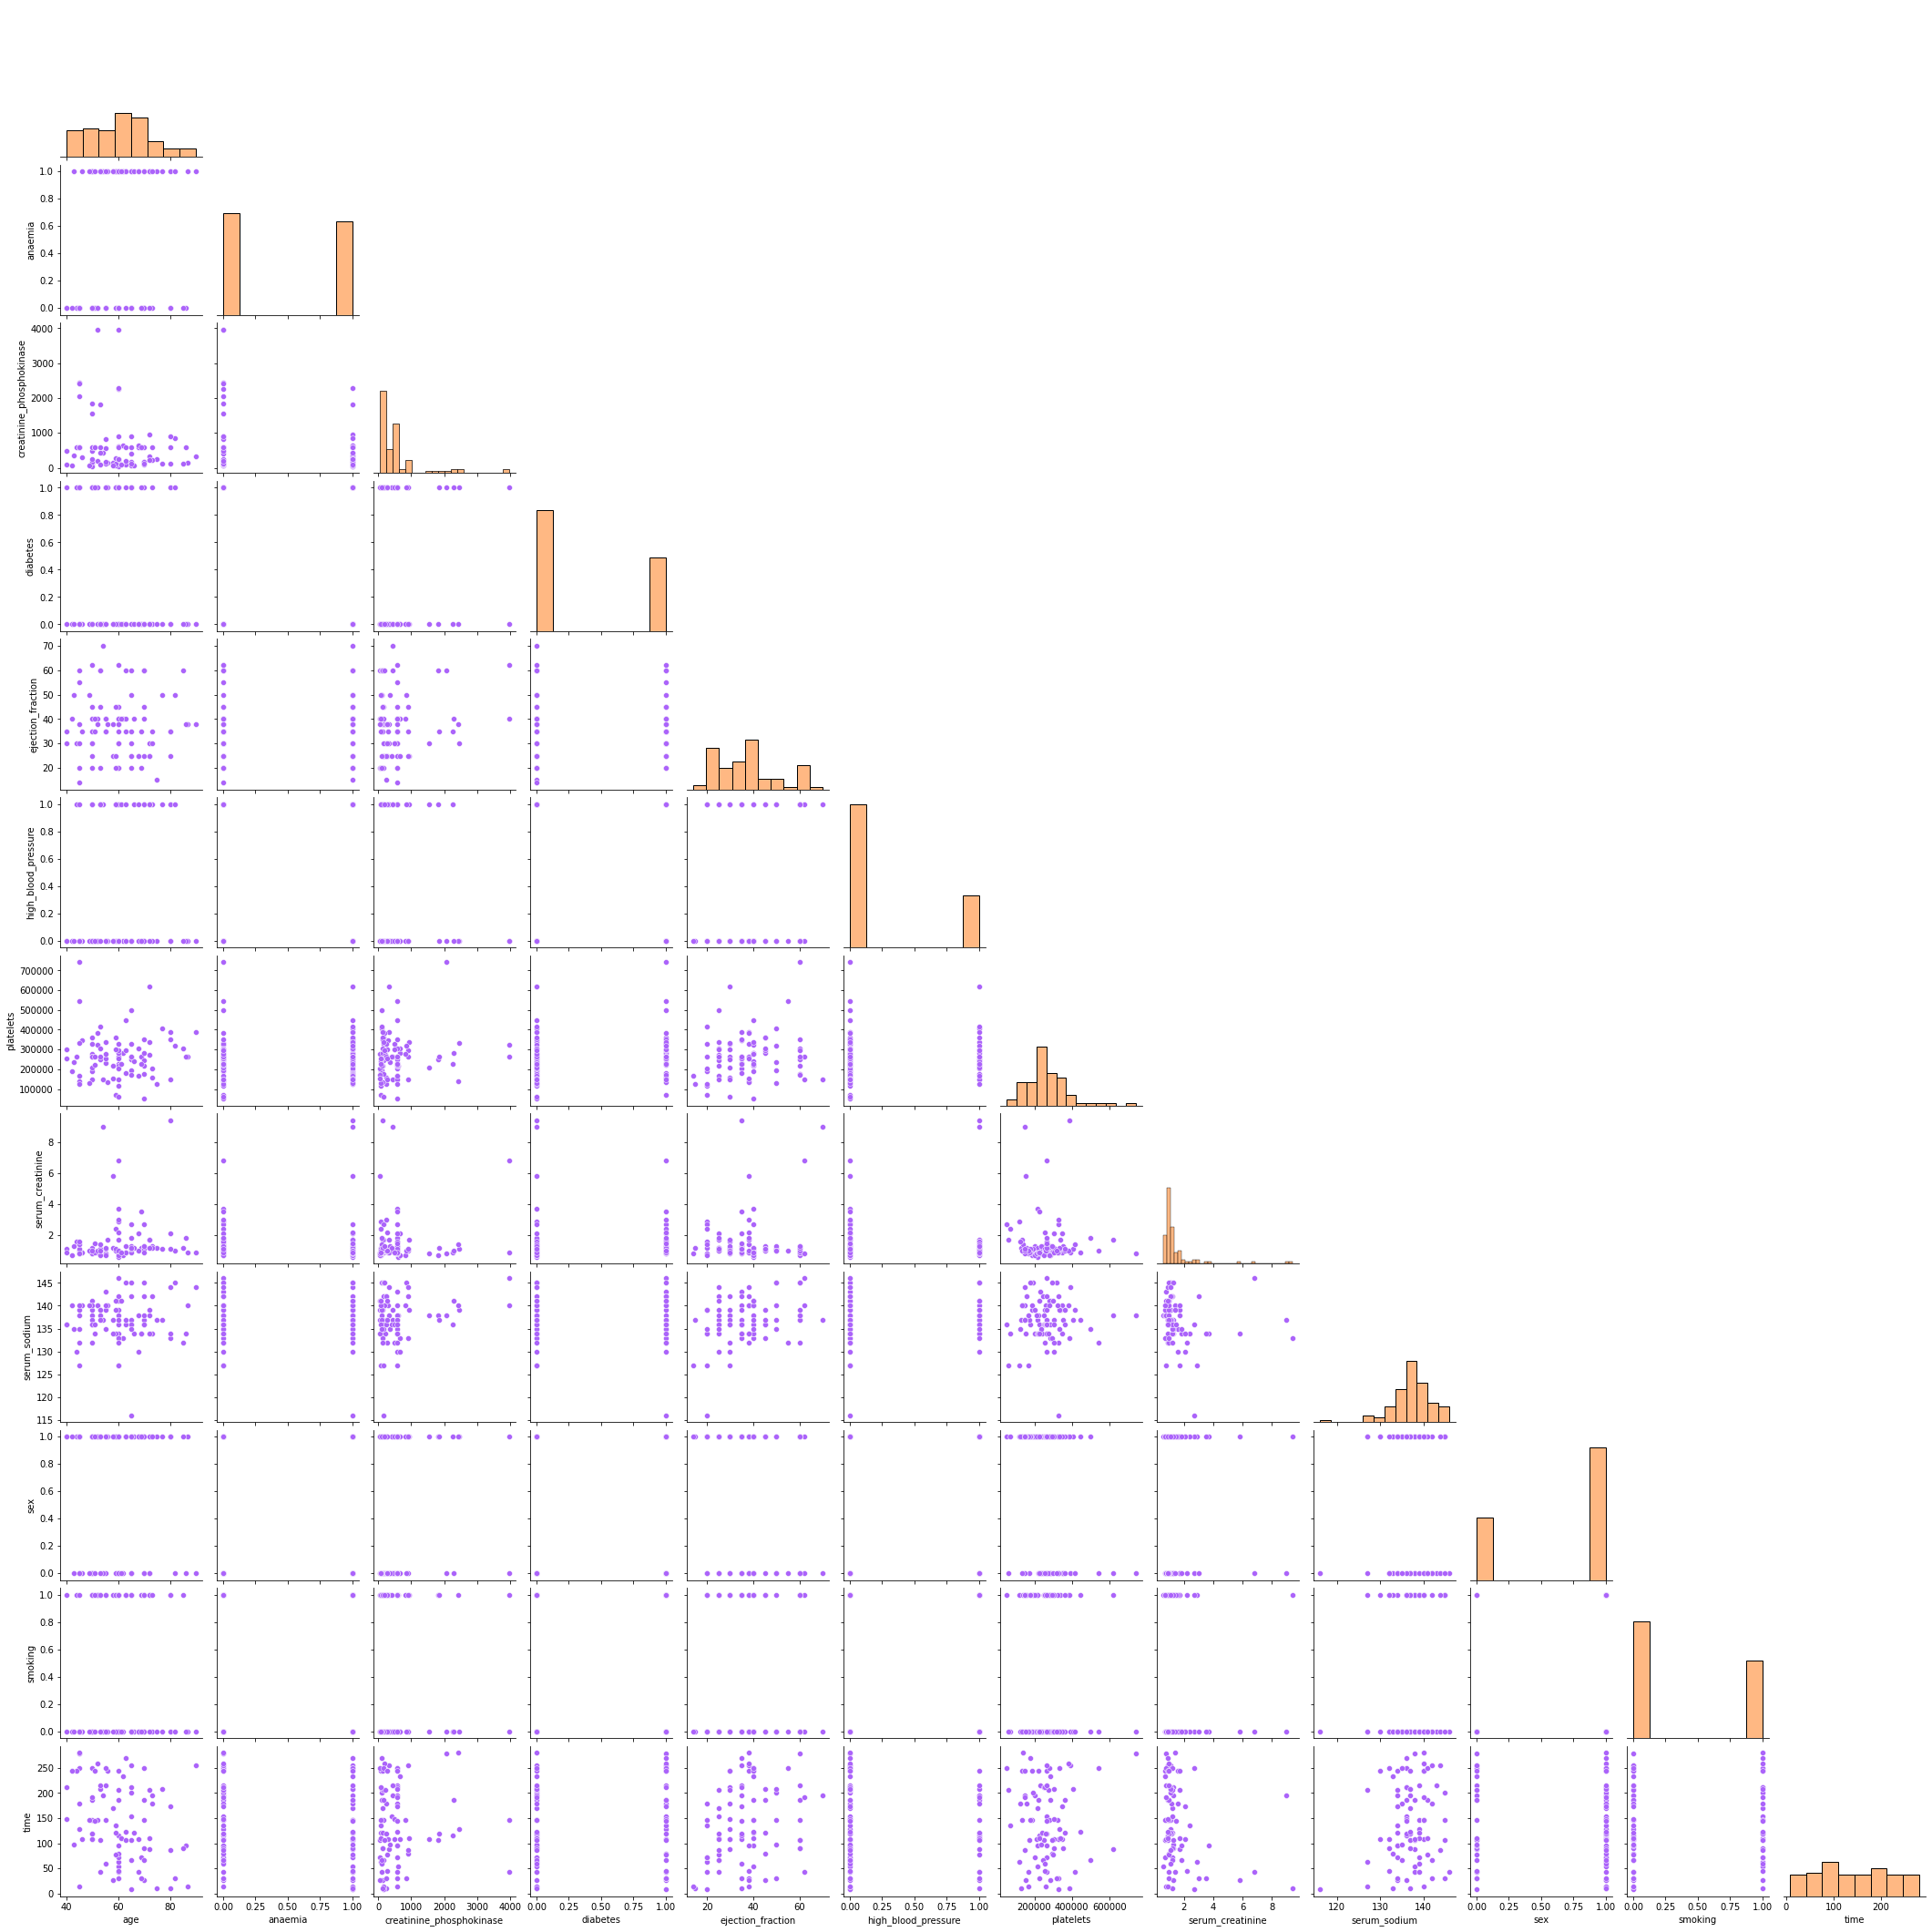

In [21]:
#Gráfico de dispersión del conjunto test

sns.pairplot(X_test, corner = True, plot_kws= {'color': '#AB63FA'}, diag_kws = {'color': '#FFA15A'})

## 4.- Preprocesamiento de los datos.

Antes de empezar a trabajar con los datos, es necesario eliminar valores atípicos y perdidos (en nuestro caso, no hay valores perdidos en la base de datos).

### Valores atípicos.

In [22]:
z_scores = stats.zscore(X_train) # Vamos a utlizar el método de zscore para eliminar valores atípicos

# Se consideran 3 veces la desviación típica
abs_z_scores = np.abs(z_scores)

no_outliers = (abs_z_scores < 3)

print("Número de valores atípicos antes de sustiutir outliers:")
print((no_outliers == False).sum())

# Calculamos la media de los valores del conjunto train (sin outliers)
new_data = X_train[no_outliers]
d = new_data.describe()
m = d.loc["mean"]

# Ahora sustituimos los valores atípicos por la media, este método solo puede utilizarse en las variables que no sean categóricas, por lo que vamos a eliminarlas

c = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'platelets', "serum_creatinine"]

for col in c:
    
    # Reemplaza los valores atípicos por el valor de la media
    X_train.loc[abs_z_scores[col] >= 3, col] = m[col]

# Vamos a comprobar si tenemos los mismos outliers

z_scores = stats.zscore(X_train)

abs_z_scores = np.abs(z_scores)

no_outliers = (abs_z_scores < 3)
            
print("Número de valores atípicos después de sustituir los outliers:")
print((no_outliers == False).sum())

# Aunque eliminemos los valores atípicos, siempre se van a crear nuevos outliers, ya que estamos cambiando nuesto dataframe por otro

Número de valores atípicos antes de sustiutir outliers:
age                         0
anaemia                     0
creatinine_phosphokinase    5
diabetes                    0
ejection_fraction           1
high_blood_pressure         0
platelets                   1
serum_creatinine            5
serum_sodium                2
sex                         0
smoking                     0
time                        0
dtype: int64
Número de valores atípicos después de sustituir los outliers:
age                         0
anaemia                     0
creatinine_phosphokinase    6
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   2
serum_creatinine            4
serum_sodium                2
sex                         0
smoking                     0
time                        0
dtype: int64


In [23]:
# Quitamos los valores atípicos en el conjunto test

# Calculamos el z_scores del conjunto test

z_scores = stats.zscore(X_test)

abs_z_scores = np.abs(z_scores)

no_outliers = (abs_z_scores < 3)

c = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'platelets', "serum_creatinine"]

for col in c:
    
    # Reemplaza los valores atípicos por el valor de la media
    X_test.loc[abs_z_scores[col] >= 3, col] = m[col]

### Valores perdidos.

In [24]:
#Vamos a comprobar si tenemos valores perdidos

# Valores perdidos
if X_train.isnull().values.any() == False:
    print("No hay valores perdidos")

else:
    print("Si hay valores perdidos")

No hay valores perdidos


### Clases desbalanceadas.

In [25]:
# Vamos a utilizar la función RandomUnderSampler de ibmlearn para tratar las clases desbalanceadas

from imblearn.under_sampling import RandomUnderSampler

# Realizamos un submuestreo con la funcion RandomUnderSampler en el que cojemos valores aleatorios de nuestra clase 
# minoritaria, y eliminamos algunos de la clase mayoritaria para que el conjunto esté balanceado

undersample = RandomUnderSampler(sampling_strategy='auto') 

La clase minoritaria es la que corresponde a una salida de 0


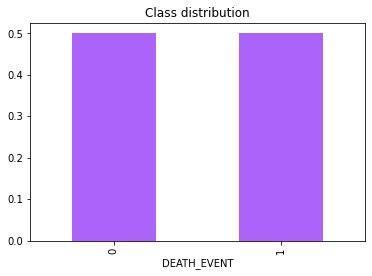

In [26]:
from collections import Counter

X_res, y_res  = undersample.fit_resample(X_train,Y_train) #Aplicamos el submuestreo realizado a nuestros datos (pacientes y la salida)
Counter(y_res) # Contamos el numero de salidas que tenemos de cada clase

#Visualizamos los resultados
class_distribution = pd.Series(y_res).value_counts(normalize=True)
ax = class_distribution.plot.bar(color = "#AB63FA")
ax.set_title("Class distribution")
pos_label = class_distribution.idxmin()
print(f"La clase minoritaria es la que corresponde a una salida de {pos_label}")

## 5.- Normalización.

Para poder trabajar con todos los datos a la vez, es necesario mapearlos a una misma escala, por lo que vamos a utilizar distintos métodos que nos permitan tener a todos los datos en una misma escala. 

Primero utilizaremos la normalización mediante el metodo minmax, en el que calculando el mínimo y el máxmimo de cada característica y haciendo una serie de operaciones podemos transformar la escala de nuestros datos.

In [27]:
from sklearn import preprocessing

c = ("anaemia", "diabetes", "high_blood_pressure", "sex", "smoking")

#Eliminamos las variables categoricas

for i in range(0,5):
    X_res=X_res.drop(c[i], axis = 1)

scaler = preprocessing.MinMaxScaler()

# Todos los valores están en el rango [0,1]
data_minmax = scaler.fit_transform(X_res)
scaled_data = pd.DataFrame(data_minmax, columns=X_res.columns)
scaled_data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.409043,0.160544,0.435556,0.468141,0.281318,0.534158,0.408700
std,0.234406,0.184573,0.224655,0.175810,0.184534,0.177018,0.301141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222727,0.037893,0.300000,0.377830,0.172414,0.416667,0.129699
50%,0.363636,0.101796,0.400000,0.468752,0.206897,0.541667,0.321429
75%,0.545455,0.209207,0.500000,0.555031,0.379310,0.666667,0.702068
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



En segundo lugar, emplearemos el método de normalización estándar, que calcula la media y la varianza para cada característica y las utiliza para transformar el conjunto de datos.

In [28]:
# Normalización estandar

from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
prep = scale.fit_transform(X_res)
standard_data = pd.DataFrame(prep, columns=X_res.columns)
standard_data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02
mean,2.220446e-16,6.696583e-17,-4.758099e-17,-4.731665e-16,3.251367e-16,-1.013299e-16,6.872809e-17
std,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00,1.003992e+00
min,-1.751981e+00,-8.732875e-01,-1.946518e+00,-2.673396e+00,-1.530565e+00,-3.029576e+00,-1.362589e+00
25%,-7.980127e-01,-6.671673e-01,-6.058042e-01,-5.157356e-01,-5.925151e-01,-6.663751e-01,-9.301771e-01
50%,-1.944816e-01,-3.195622e-01,-1.588995e-01,3.486009e-03,-4.049051e-01,4.258509e-02,-2.909601e-01
75%,5.842682e-01,2.646994e-01,2.880053e-01,4.961947e-01,5.331447e-01,7.515453e-01,9.780736e-01
max,2.531143e+00,4.566249e+00,2.522529e+00,3.037264e+00,3.910124e+00,2.642106e+00,1.971367e+00


Estos dos primeros métodos pueden ser útiles para algoritmos sensibles a la escala de las características, ya que normalizan dichas escalas. Otro método interesante es el método Robust scaler.

El método robust scaler permite reescalar los valores de un dataframe, pero lo que lo hace diferente de los demás métodos es que emplea recursos resistentes a los valores atípicos, en concreto emplea los quantiles y la moda, que no se ven afectados por los outliers.

In [29]:
# La funcion RobustScaler realiza un escalado resistente a valores atípicos, gracias a que en lugar de utilizar la media y la varianza utiliza la moda y los cuartiles, 
# valores que no se ven influenciados por los outliers

from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X_res)
X_train_transformed = transformer.transform(X_res)
transformed_data = pd.DataFrame(X_train_transformed, columns=X_res.columns)
transformed_data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.140696,0.342927,0.177778,-0.003445,0.359705,-0.030033,0.152475
std,0.726330,1.077399,1.123273,0.992155,0.891914,0.708074,0.526132
min,-1.126761,-0.594211,-2.000000,-2.645322,-1.000000,-2.166667,-0.561576
25%,-0.436620,-0.373020,-0.500000,-0.513100,-0.166667,-0.500000,-0.334975
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.563380,0.626980,0.500000,0.486900,0.833333,0.500000,0.665025
max,1.971831,5.243037,3.000000,2.998011,3.833333,1.833333,1.185550
